In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import pydotplus

from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


data = pd.read_csv("dataset.csv")

x = data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']]
y = data[["y"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = y_train.values.ravel()

In [21]:
# Create an instance of PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance

# Apply PCA on the training set
x_train_pca = pca.fit_transform(x_train)

# Apply PCA on the test set
x_test_pca = pca.transform(x_test)

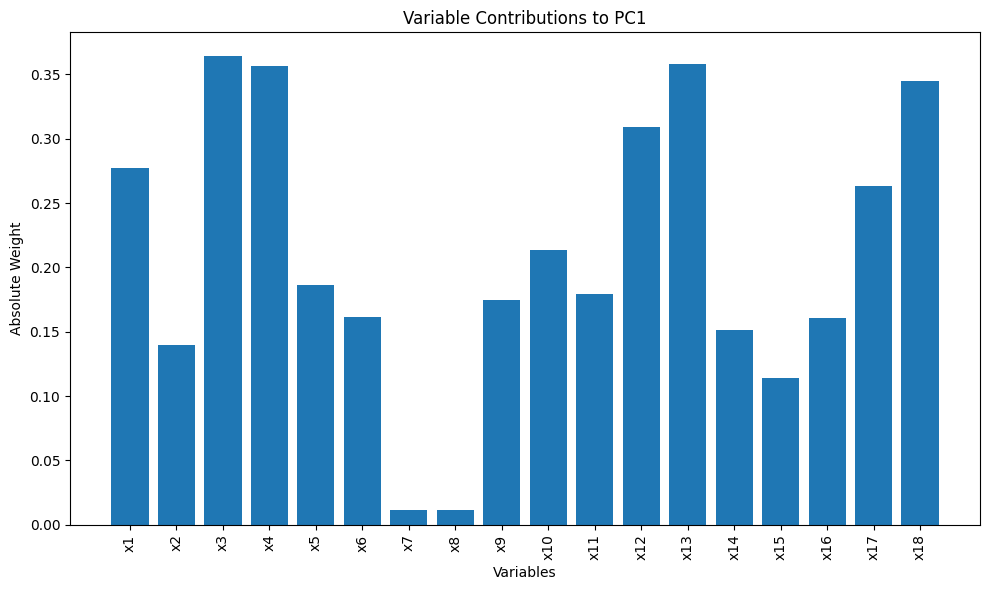

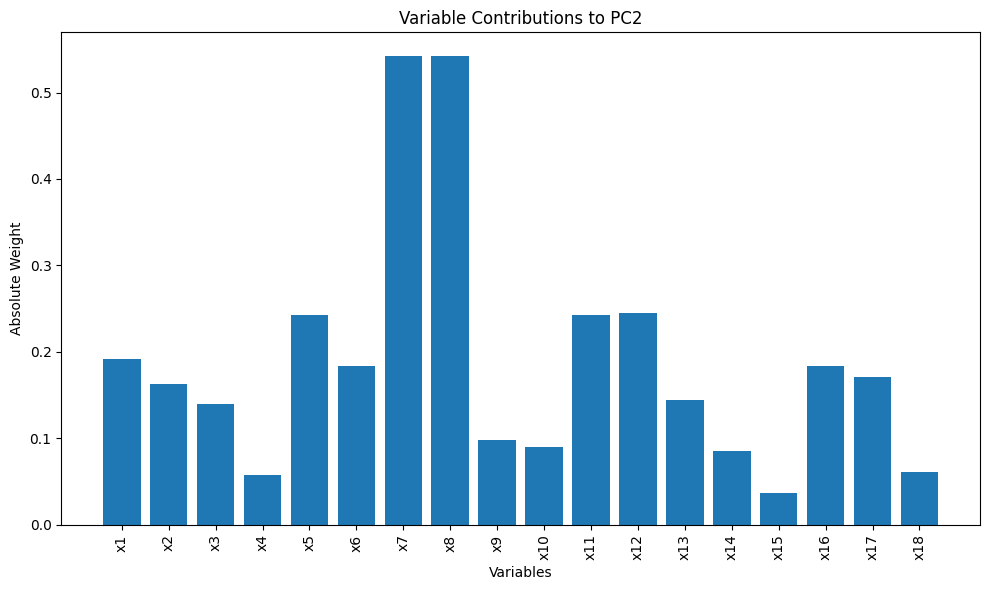

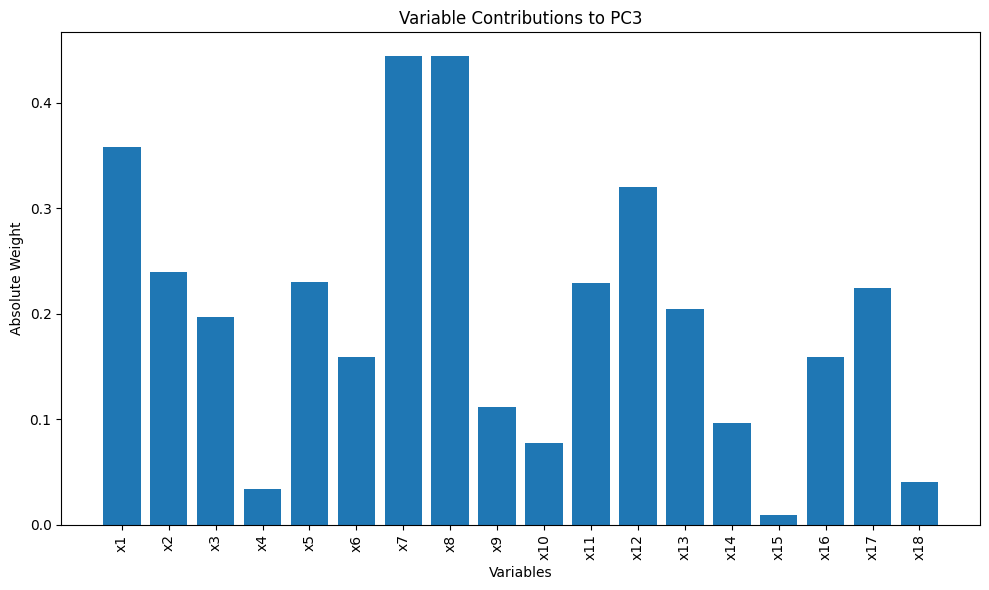

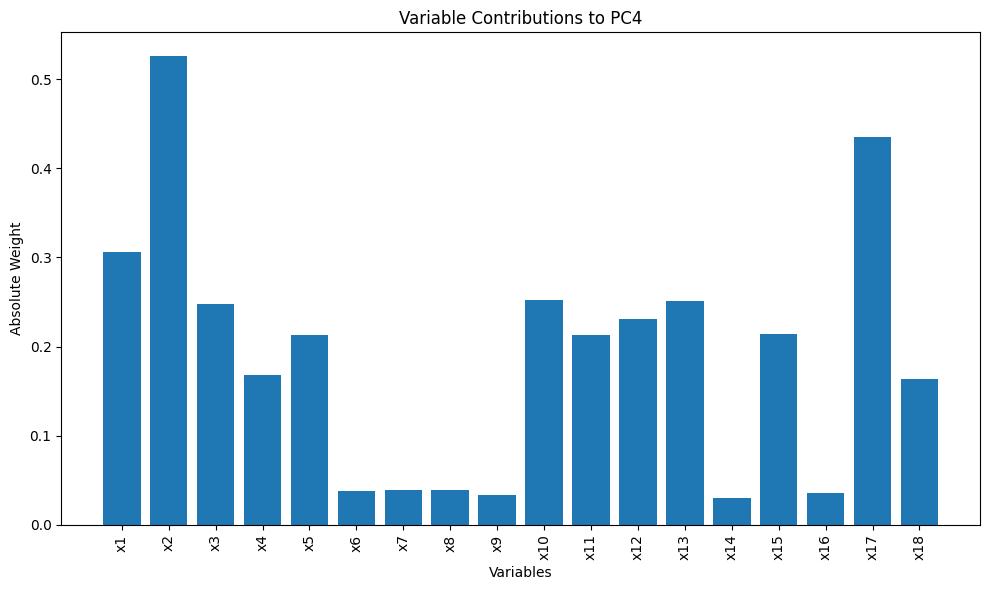

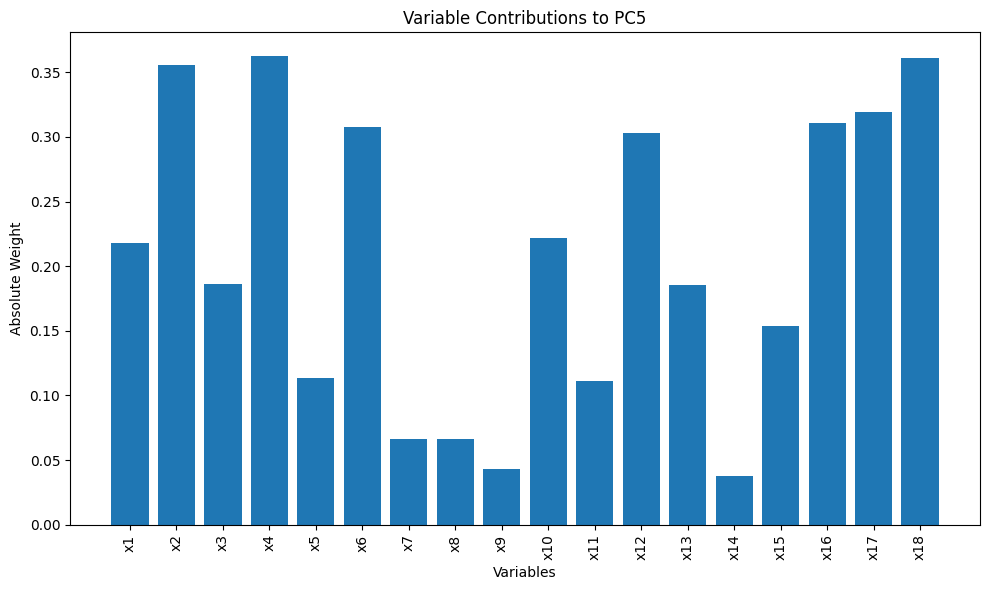

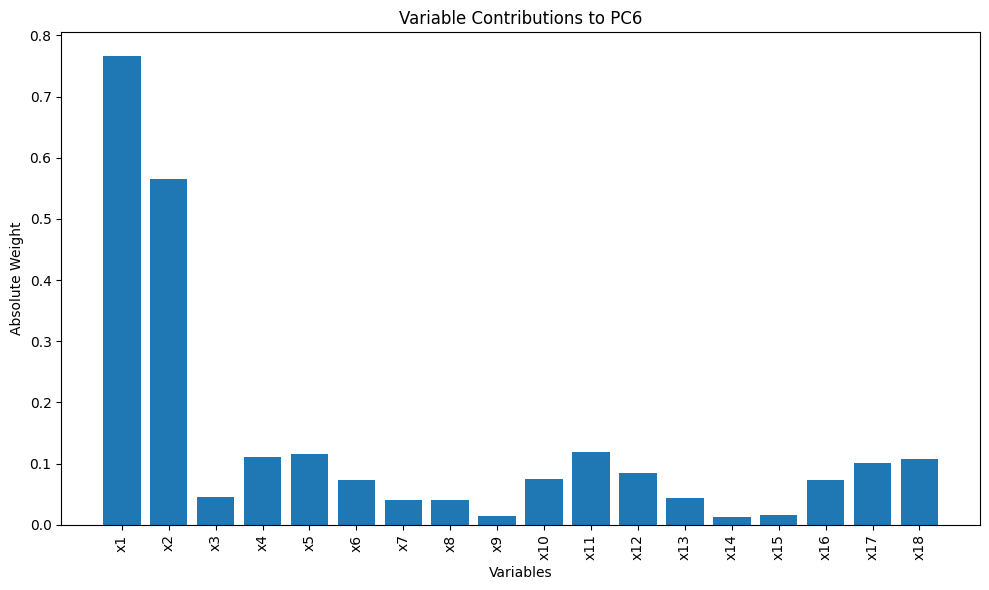

In [23]:


# We obtained the component weights in component_weights
component_weights = pca.components_

# Get the feature names
feature_names = x_train.columns

# Get the number of principal components
num_pcs = component_weights.shape[0]

# Array of feature indices
feature_indices = np.arange(len(feature_names))

# Create a bar plot for each principal component
for pc in range(num_pcs):
    # Get the weights of the variables on the current pc
    pc_weights = component_weights[pc]

    # Calculate the absolute values of the weights
    abs_pc_weights = np.abs(pc_weights)

    # Create a bar plot for variable contributions to the current principal component
    plt.figure(figsize=(10, 6))
    plt.bar(feature_indices, abs_pc_weights)
    plt.xticks(feature_indices, feature_names, rotation=90)
    plt.xlabel('Variables')
    plt.ylabel('Absolute Weight')
    plt.title(f'Variable Contributions to PC{pc+1}')

    plt.tight_layout()
    plt.show()
